<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence 

<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence \ 
<input>:58: DeprecationWarning: invalid escape sequence 

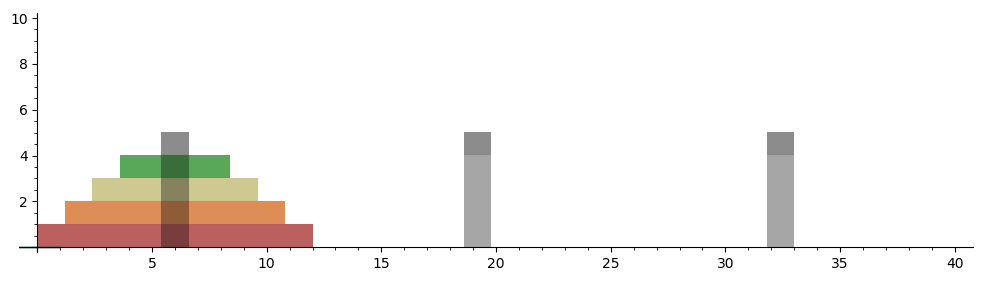

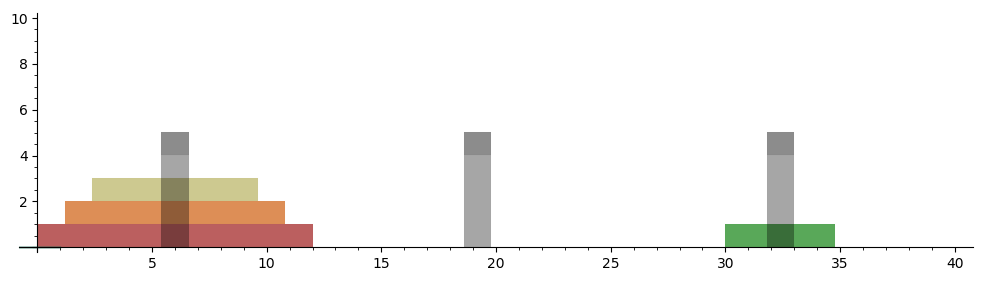

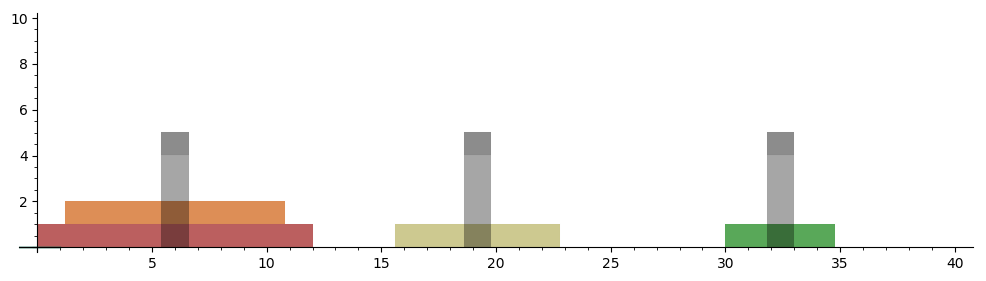

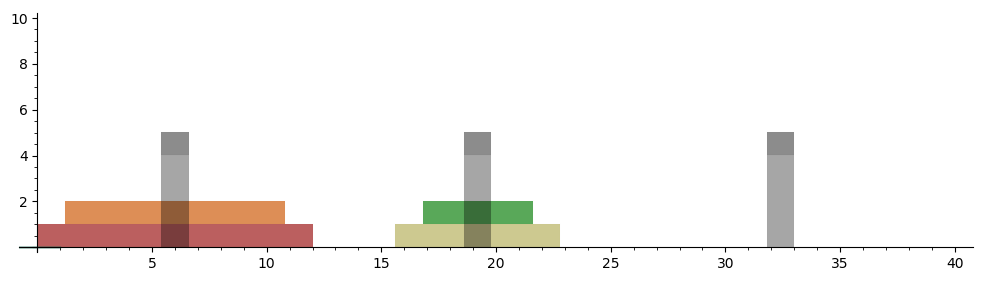

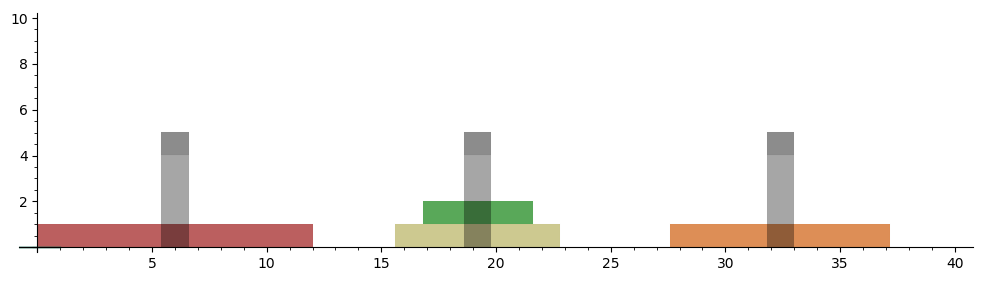

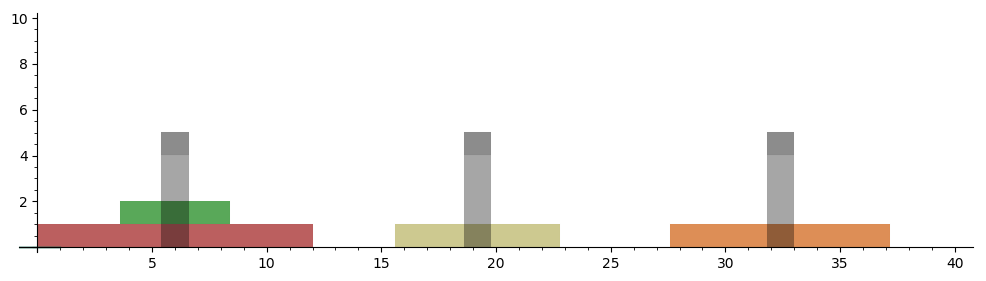

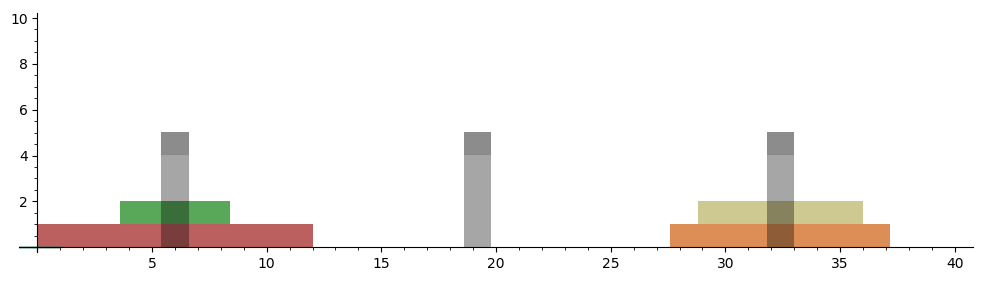

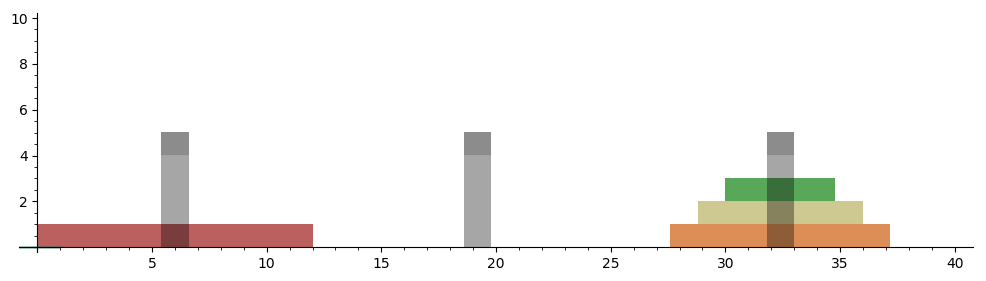

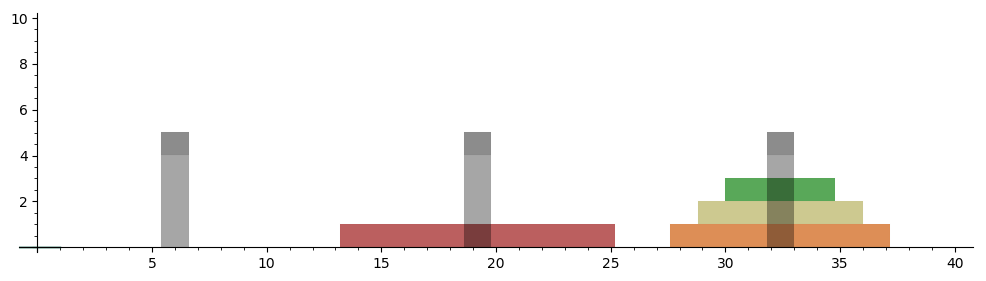

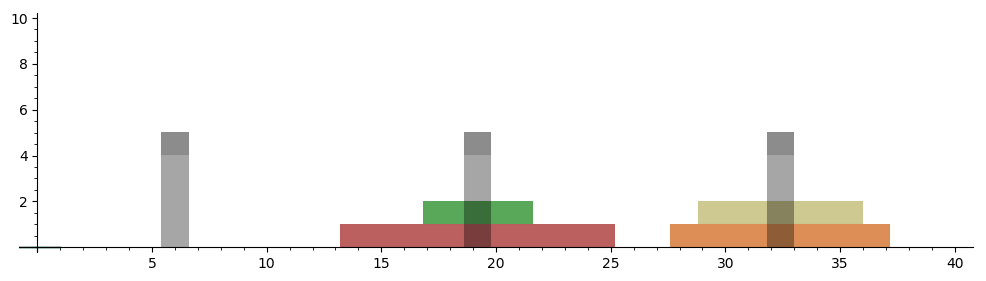

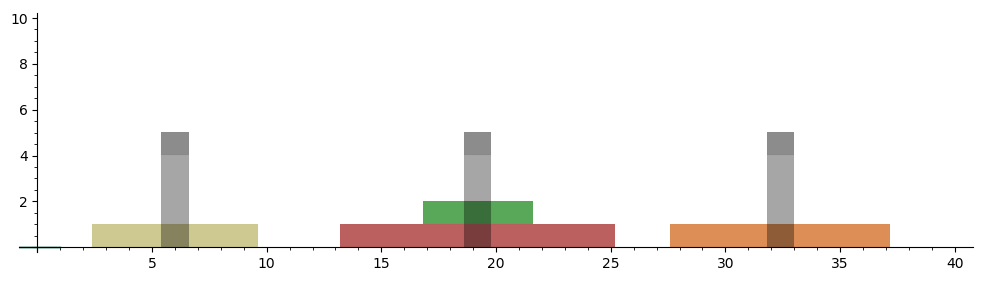

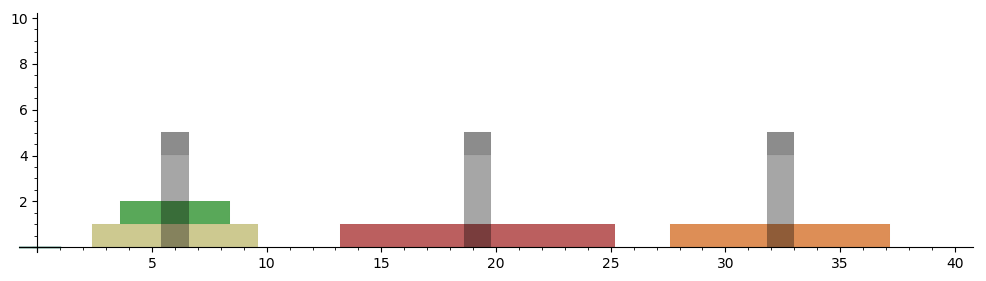

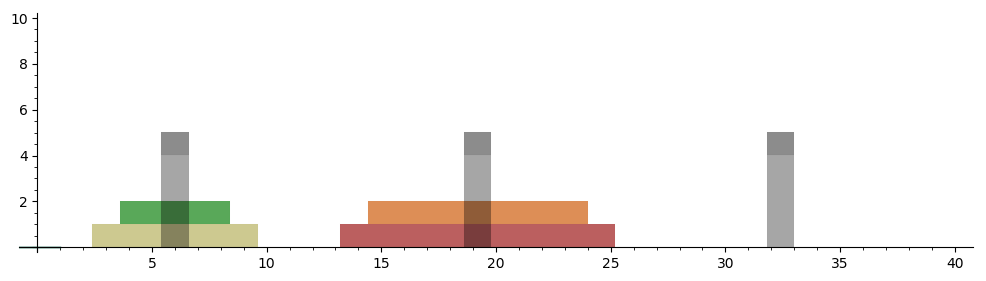

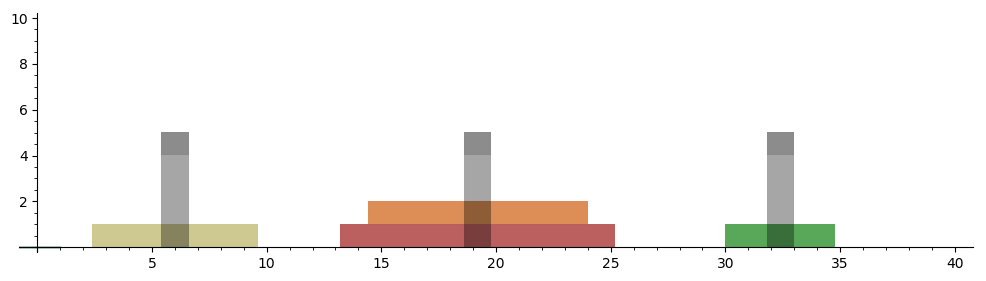

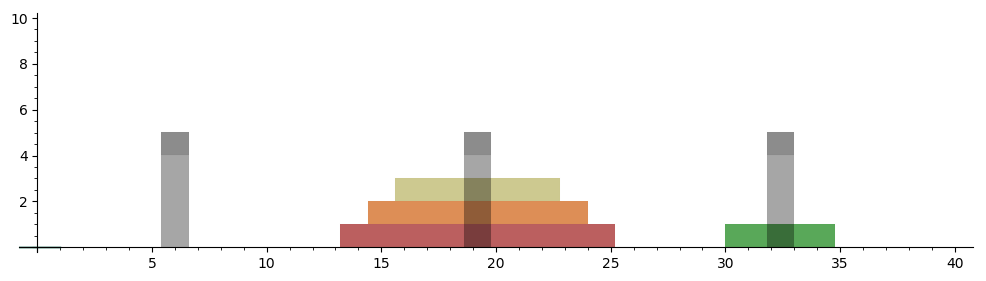

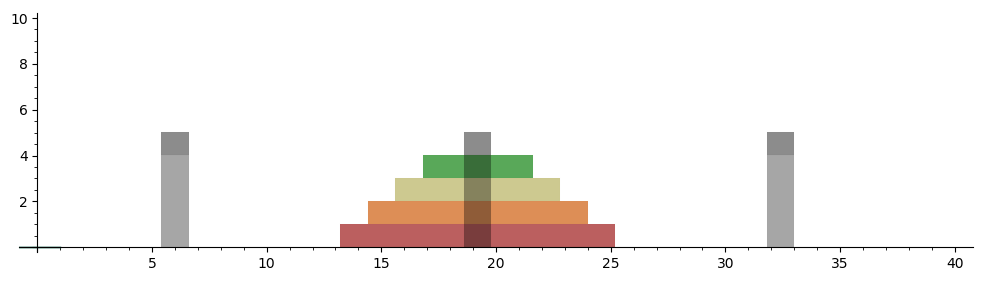

In [1]:
from sage.plot.polygon import polygon

from copy import deepcopy
"""it took me several hours to understand the malfunctions of my Python program.
Because of the fact that I did not understand the problems of copy of list, 
when these lists include sublists !! 
I wondered even if I did not lose my head, 
so I did not understand what was happening ;-).
But after searching the web, 
the deepcopy() function has saved me a lot of headaches!
what I call fifos are in fact LIFOS !!!
"""
# https://www.python-course.eu/deep_copy.php

def myRandom(k): return floor(k*random())
def make_3xN_matrix(k,N):

    
    return matrix(ZZ,[[myRandom(k) for tower in (1..N)] for peg in (1..3)])

"""this function TowerOfHanoi(n , from_rod,to_rod,aux_rod,Re) was adapted from Source: 
https://www.geeksforgeeks.org/python-program-for-tower-of-hanoi/
(you do not have to reinvent the wheel every time!)
 Recursive Python function to solve tower of hanoi 
 '0', '1', '2' are the name of rods (or pegs)  
 Contributed By Harshit Agrawal , 
example for rN=n=3 rings of GlobalStateRegisterT list created:
[[3,0,0],[2,1,0],[1,1,1],[1,0,2],[0,1,2],[1,1,1],[1,2,0],[0,3,0]]"""

def TowerOfHanoi(n , from_rod,to_rod,aux_rod,Re):
    global GlobalStateRegisterT
    if n == 1:
        Re[Integer(from_rod)]-=1
        Re[Integer(to_rod)]+=1
        GlobalStateRegisterT.append(copy(Re))
        #print( "Move disk 1 from rod",from_rod,"to rod",to_rod,Re)
        
        return 
    TowerOfHanoi(n-1, from_rod, aux_rod, to_rod,Re)
    Re[Integer(from_rod)]-=1
    Re[Integer(to_rod)]+=1
    GlobalStateRegisterT.append(copy(Re))
    #print ("Move disk",n,"from rod",from_rod,"to rod",to_rod,Re )
    TowerOfHanoi(n-1, aux_rod, to_rod, from_rod,Re) 

def setStateFifos(rN,GlobalStateRegisterT):
    """ the three towers are represented by three Fifos
        with first initial state :[[0,1,2],[],[]],second state:[[0,1],[2],[]]
        ...et cetera
        example of stateFifos for rN=3 rings :
        [  
       [[0,1,2],[],[]], [[0,1],[2],[]], [[0],[2],[1]], [[0],[],[1,2]], \ 
       [[],[0],[1,2]],[[2],[0],[1]],[[2],[0,1],[]],[[],[0,1,2],[]]   
        ]
        example of StateVectorT which represents the increment decrement of each tower:
        [(−1,1,0),(−1,0,1),(0,−1,1),(−1,1,0),(1,0,−1),(0,1,−1),(−1,1,0)]
        
        """
    stateVectorT=[]
    for s in range(1,len(GlobalStateRegisterT)) :
        diffRS=vector(GlobalStateRegisterT[s])-vector(GlobalStateRegisterT[s-1])
        stateVectorT.append(copy(diffRS))
    #show(stateVectorT) 
    
    r_0=[0..rN-1]
    r_1=[]
    r_2=[]
    minus=0;plus=0;
    stateFifos=[]
    stateFifos.append([copy(r_0),copy(r_1),copy(r_2)])
    for s in stateVectorT :
        for c in range(0,len(s)) :
            if s[c]==-1 :
                minus=c
            if s[c]== 1 :
                plus=c
        if minus==0 :
            t=r_0.pop()
        elif minus==1 :
            t=r_1.pop()
        else :
            t=r_2.pop()
        #show('r_0 : ',r_0,' r_1 : ',r_1,' r_2 : ',r_2,' plus : ',plus,' minus : ',minus )         
       
        if plus==0 :
            r_0.append(t)
            
        elif plus==1 :
            r_1.append(t)
        else :
            r_2.append(t)
        stateFifos.append([copy(r_0),copy(r_1),copy(r_2)])
        #show('r_0 : ',r_0,' r_1 : ',r_1,' r_2 : ',r_2)
    return(stateFifos,stateVectorT)


def buildHanoisTowers(rN=3 ,heightRing=1,widestRing=12,diffWidthRing=12/10,rodWidth=12/10,thicknessRing=1/100, \
                   xStartRing=0,yStartRing=0, colorSet=3):
    '''
    this function build a list with the three towers each filled with all the rings
    rN : the total number of rings
    heightRing : height of each ring
    widestRing: width of the widest ring
    diffWidthRing : difference between each ring width (n) ring width(n+1) 
    thicknessRing : thickness of the line in the drawing
    xStartRing : left side position of the widest ring
    yStartRing : bottom side position of the widest ring
    colorSet : choose the different colors of the ring set
    positionRing :position of the ring, if positionRing<>ring, it means the ring is in transit
    polygonRing : return the position and color of the ring 
                  [[[xL,yL], [xH,yL], [xH,yH],[xL,yH]],colors]
                  
    example of returned (PTT) polygonT List for rN=3 rings 
    lists of 3 towers*3 rings + 3*(2 black polygons for figuring the rods)
    = 15 polygons:
    
    [[[[[0, 0], [12, 0], [12, 1], [0, 1]], 'blanchedalmond'],
  [[[6/5, 101/100], [54/5, 101/100], [54/5, 201/100], [6/5, 201/100]],
   'brown'],
  [[[12/5, 101/50], [48/5, 101/50], [48/5, 151/50], [12/5, 151/50]], 'cyan'],
  [[(27/5, 303/100), (33/5, 303/100), (33/5, 403/100), (27/5, 403/100)],
   'black'],
  [[(27/5, 0), (33/5, 0), (33/5, 303/100), (27/5, 303/100)], 'black']],
 [[[[66/5, 0], [126/5, 0], [126/5, 1], [66/5, 1]], 'blanchedalmond'],
  [[[72/5, 101/100], [24, 101/100], [24, 201/100], [72/5, 201/100]], 'brown'],
  [[[78/5, 101/50], [114/5, 101/50], [114/5, 151/50], [78/5, 151/50]], 'cyan'],
  [[(93/5, 303/100), (99/5, 303/100), (99/5, 403/100), (93/5, 403/100)],
   'black'],
  [[(93/5, 0), (99/5, 0), (99/5, 303/100), (93/5, 303/100)], 'black']],
 [[[[132/5, 0], [192/5, 0], [192/5, 1], [132/5, 1]], 'blanchedalmond'],
  [[[138/5, 101/100], [186/5, 101/100], [186/5, 201/100], [138/5, 201/100]],
   'brown'],
  [[[144/5, 101/50], [36, 101/50], [36, 151/50], [144/5, 151/50]], 'cyan'],
  [[(159/5, 303/100), (33, 303/100), (33, 403/100), (159/5, 403/100)],
   'black'],
  [[(159/5, 0), (33, 0), (33, 303/100), (159/5, 303/100)], 'black']]]
                  
    '''
    polygonRing=[]   
    colorRingsT=sorted(colors)[mod(rN*(colorSet),len(sorted(colors)))]
    xL=xStartRing; xH=xStartRing+widestRing ;yL=yStartRing; yH=yStartRing+heightRing 
    pT=[]
    pTT=[]

    for L in range (0,3):
        pT=[];
        for C in range(0,rN):
            pT.append([[[xL,yL], [xH,yL], [xH,yH],[xL,yH]],\
            sorted(colors)[mod(rN*(colorSet+ C^2),len(sorted(colors)))]])
            xL+=diffWidthRing;xH-=diffWidthRing;yL+=(ringHeight+thicknessRing);yH+=(ringHeight+thicknessRing);
        #show(pT)
        hRod=heightRing
        rodX=(widestRing/2+xStartRing)-rodWidth/2
        pT.append([[(rodX,yL), (rodX + rodWidth,yL), (rodX+rodWidth,yH),(rodX,yH)],'black'])
        pT.append([[(rodX,yStartRing), (rodX + rodWidth,yStartRing), (rodX+rodWidth,yL),(rodX,yL)],'black'])
        xStartRing+=widestRing+rodWidth
        xL=xStartRing; xH=xStartRing+widestRing ;yL=yStartRing; yH=yStartRing+heightRing
        pTT.append(pT)
    return(pTT)




def verifyPolygonT(rN,polygonT):
    i=0
    for p in polygonT:
        print ('                     Tower : ' +str(i))
        #show(p)
        j=0
        for pp in p:
            if j< rN :
                print ('ring : ' +str(j))
            else :
                 print ('peg : ' +str(j-rN))
            show(pp)
            j+=1
        i+=1
    return

def changeYringsCoordinates(A_,B):
    """ this function change the initial ring Y position with 
        the real position of the ring into his Fifo
    """
    A=deepcopy(A_)
    for i in range(0,len(A[0])) :
        A[0][i][1]=B[0][i][1]
        #print (A[0][i][1],B[0][i][1],' : ',B[0][i][1],A[0][i][1])


    return A

def allStatePolygonsCompile(rN,polygonT,stateFifos ):
    """ this function builds the Hanoi's Towers differents States List,
    Example for rN=3
    
    [[[[[0, 0], [12, 0], [12, 1], [0, 1]], 'blanchedalmond'],
  [[[6/5, 101/100], [54/5, 101/100], [54/5, 201/100], [6/5, 201/100]],
   'brown'],
  [[[12/5, 101/50], [48/5, 101/50], [48/5, 151/50], [12/5, 151/50]], 'cyan']],
 [[[[0, 0], [12, 0], [12, 1], [0, 1]], 'blanchedalmond'],
  [[[6/5, 101/100], [54/5, 101/100], [54/5, 201/100], [6/5, 201/100]],
   'brown'],
  [[[78/5, 0], [114/5, 0], [114/5, 1], [78/5, 1]], 'cyan']],
 [[[[0, 0], [12, 0], [12, 1], [0, 1]], 'blanchedalmond'],
  [[[78/5, 0], [114/5, 0], [114/5, 1], [78/5, 1]], 'cyan'],
  [[[138/5, 0], [186/5, 0], [186/5, 1], [138/5, 1]], 'brown']],
 [[[[0, 0], [12, 0], [12, 1], [0, 1]], 'blanchedalmond'],
  [[[138/5, 0], [186/5, 0], [186/5, 1], [138/5, 1]], 'brown'],
  [[[144/5, 101/100], [36, 101/100], [36, 201/100], [144/5, 201/100]],
   'cyan']],
 [[[[66/5, 0], [126/5, 0], [126/5, 1], [66/5, 1]], 'blanchedalmond'],
  [[[138/5, 0], [186/5, 0], [186/5, 1], [138/5, 1]], 'brown'],
  [[[144/5, 101/100], [36, 101/100], [36, 201/100], [144/5, 201/100]],
   'cyan']],
 [[[[12/5, 0], [48/5, 0], [48/5, 1], [12/5, 1]], 'cyan'],
  [[[66/5, 0], [126/5, 0], [126/5, 1], [66/5, 1]], 'blanchedalmond'],
  [[[138/5, 0], [186/5, 0], [186/5, 1], [138/5, 1]], 'brown']],
 [[[[12/5, 0], [48/5, 0], [48/5, 1], [12/5, 1]], 'cyan'],
  [[[66/5, 0], [126/5, 0], [126/5, 1], [66/5, 1]], 'blanchedalmond'],
  [[[72/5, 101/100], [24, 101/100], [24, 201/100], [72/5, 201/100]], 'brown']],
 [[[[66/5, 0], [126/5, 0], [126/5, 1], [66/5, 1]], 'blanchedalmond'],
  [[[72/5, 101/100], [24, 101/100], [24, 201/100], [72/5, 201/100]], 'brown'],
  [[[78/5, 101/50], [114/5, 101/50], [114/5, 151/50], [78/5, 151/50]],
   'cyan']]]"""

    polygonST=[]
    polygonSTT=[]
    for towerState in range(0,len(stateFifos)) :
    # for test :for towerState in range(0,4) :
        polygonST=[]
        for rod in range(0,len(stateFifos[towerState])):

                for fifoPosition in range(0,len(stateFifos[towerState][rod])) :
                    ring=copy(stateFifos[towerState][rod][fifoPosition])
                    #print ( " rod : ",rod, "fifo position : ",fifoPosition," ring : ",ring)
                    polygonST.append(changeYringsCoordinates(deepcopy(polygonT[rod][ring]),\
                                                 deepcopy(polygonT[rod][fifoPosition])))
                    #show("polygonST : ",polygonST)
         
        polygonSTT.append(polygonST)
        #print ("next state")               
    return(polygonSTT)


# number of rings
rN=4
initialHanoiTowers=[rN, 0, 0] #first ring at index 1
#print ("initialHanoiTowers : ", initialHanoiTowers)
GlobalStateRegisterT=[]
GlobalStateRegisterT.append(copy(initialHanoiTowers))
TowerOfHanoi(rN, '0', '1', '2',initialHanoiTowers) 
#show(GlobalStateRegisterT)
stateFifos,stateVectorT=setStateFifos(rN,GlobalStateRegisterT)
# the Hanoi's towers are represented by 3 Fifos
#show(stateFifos)
#show(stateVectorT)
xStart=0
ringHeight=1
yStart=(rN^2 -1)*ringHeight*(rN)
polygonT=buildHanoisTowers(rN)
#verifyPolygonT(rN,polygonT)
allStatePolygonsCompiled=allStatePolygonsCompile(rN,polygonT,stateFifos )



# to visualize Hanoi's Towers views

figSizeXmax=10
figSizeYmax=5
def viewvPolygonT(rN,polygonTest,figSizeXmax,figSizeYmax):
    """this function builds the graphical view of the different polygons"""
    G1=plot([0,0])
    #show(allStatePolygonsCompiled)
    polygonGT1=[]
    for s in polygonTest :
        polygonGT1=[]
        G1=plot([0,0])
        #show(s)
        for p in s:
            #print (s)
            polygonGT1.append(polygon(p[0],alpha=0.75, \
            fill=True, thickness=1/100,axes=False,figsize=[figSizeXmax,figSizeYmax],  \
            color=p[1]))
########################################################
        for rod in range(0,len(polygonT)) :
            for rodPolygon in range(0,len(polygonT[rod])) :
                if rodPolygon ==rN :
                    #  top rod
                    #show(polygonT[rod][rodPolygon])
                    polygonGT1.append(polygon(polygonT[rod][rodPolygon][0],alpha=0.45, \
                        fill=True, thickness=1/100,axes=False,figsize=[figSizeXmax,figSizeYmax],   \
                        color=polygonT[rod][rodPolygon][1]))
                elif rodPolygon==rN+1 :
                    # bottom rod
                    polygonGT1.append(polygon(polygonT[rod][rodPolygon][0],alpha=0.35, \
                        fill=True, thickness=1/100,axes=True,figsize=[figSizeXmax,figSizeYmax] , \
                        color=polygonT[rod][rodPolygon][1]))
########################################################
        for pg1 in polygonGT1 :
            G1+=pg1


        G1.show(figsize=[figSizeXmax,figSizeYmax],xmin=0,xmax=40,ymin=0,ymax=10)
    return
#viewvPolygonT(rN,polygonT)
viewvPolygonT(rN,allStatePolygonsCompiled,figSizeXmax,figSizeYmax)
